In [ ]:
from fastai.basics import *
from fastai.vision.all import *
from sklearn import metrics

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from my_utils import dotdict

In [ ]:
from wandb_sweep import get_dls, get_learner

In [ ]:
import wandb

api = wandb.Api()

In [ ]:
class Hook():
    def __init__(self, m):
        self.hook = m.register_forward_hook(self.hook_func)
    def hook_func(self, m, i, o): self.stored = o.detach().clone()
    def __enter__(self, *args): return self
    def __exit__(self, *args): self.hook.remove()

In [ ]:
class HookBwd():
    def __init__(self, m):
        self.hook = m.register_backward_hook(self.hook_func)
    def hook_func(self, m, gi, go): self.stored = go[0].detach().clone()
    def __enter__(self, *args): return self
    def __exit__(self, *args): self.hook.remove()

#### baseline

In [ ]:
sweep_id = "m4nqsh6e"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
best_run_config = sweep.best_run().config

wandb: Sorting runs by -summary_metrics.combined_f1_time


In [ ]:
config = dotdict(best_run_config)
config.correct_labels = True
config.inference = True
config.real_gw_eval = True

In [ ]:
config.real_gw_version = '6'
#v1 version w/o shift and vmax=25.5
#v2 version with shift and vmax=25.5
#v3 version with shift and vmax=50
#v4 version with shift and no vmax
#v5 Samuel's version, selected samples, not shifted
#v6 Samuel's version, selected samples, shifted
#v6a Samuel's version, selected samples, shifted

In [ ]:
dls, _, n_channels = get_dls(config)
learner = get_learner(config, dls, n_channels)
vocab = list(learner.dls.train_ds.class_dict.keys())
learner.load(f"{sweep_id}_run{config.experiment_no}")

<fastai.learner.Learner>

In [ ]:
first_layer = learner.model.conv1
first_layer

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [ ]:
tt = dls[2].one_batch()
x = tt[0][0]
x = x[None, :]
x.shape, x[-1,:].shape

(torch.Size([1, 3, 140, 170]), torch.Size([3, 140, 170]))

In [ ]:
cls = 4
with HookBwd(first_layer) as hookg:
    with Hook(first_layer) as hook:
        output = learner.model.eval()(x)
        act = hook.stored
    output[0,cls].backward()
    grad = hookg.stored

<AxesSubplot:>

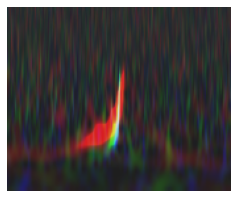

In [ ]:
show_image(x[-1,:])

<matplotlib.colorbar.Colorbar>

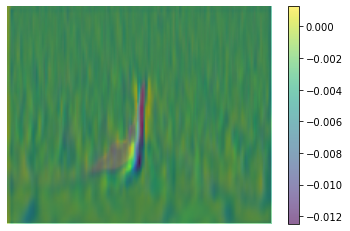

In [ ]:
w = grad[0].mean(dim=[1,2], keepdim=True)
cam_map = (w * act[0]).sum(0)
_,ax = plt.subplots()
show_image(x[-1,:], ax=ax)
img = ax.imshow(cam_map, alpha=0.6, extent=(0,170,140,0), interpolation='bilinear', cmap='viridis');
plt.colorbar(img)

<matplotlib.colorbar.Colorbar>

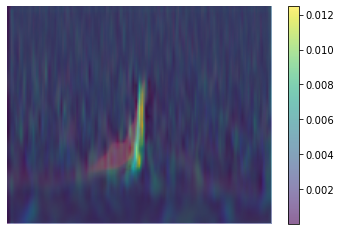

In [ ]:
w = grad[0].mean(dim=[1,2], keepdim=True)
cam_map = abs((w * act[0]).sum(0))
_,ax = plt.subplots()
show_image(x[-1,:], ax=ax)
img = ax.imshow(cam_map, alpha=0.6, extent=(0,170,140,0), interpolation='bilinear', cmap='viridis');
plt.colorbar(img)

#### tl_best5

In [ ]:
sweep_id = "1cesj6eh"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
best_run_config = sweep.best_run().config

wandb: Sorting runs by -summary_metrics.combined_f1_time


In [ ]:
config = dotdict(best_run_config)
config.correct_labels = True
config.inference = True
config.real_gw_eval = True

In [ ]:
config.real_gw_version = '6'
#v1 version w/o shift and vmax=25.5
#v2 version with shift and vmax=25.5
#v3 version with shift and vmax=50
#v4 version with shift and no vmax
#v5 Samuel's version, selected samples, not shifted
#v6 Samuel's version, selected samples, shifted
#v6a Samuel's version, selected samples, shifted

In [ ]:
dls, _, n_channels = get_dls(config)
learner = get_learner(config, dls, n_channels)
vocab = list(learner.dls.train_ds.class_dict.keys())
learner.load(f"{sweep_id}_run{config.experiment_no}")

<fastai.learner.Learner>

In [ ]:
first_layer = learner.model.stem[0]
img = ax.imshow(cam_map, alpha=0.4, extent=(0,170,140,0), interpolation='bilinear', cmap='magma');
plt.colorbar(img)]
first_layer

Conv2d(3, 80, kernel_size=(4, 4), stride=(4, 4))

In [ ]:
tt = dls[2].one_batch()
x = tt[0][0]
x = x[None, :]
x.shape, x[-1,:].shape

(torch.Size([1, 3, 140, 170]), torch.Size([3, 140, 170]))

In [ ]:
cls = 4
with HookBwd(first_layer) as hookg:
    with Hook(first_layer) as hook:
        output = learner.model.eval()(x)
        act = hook.stored
    output[0,cls].backward()
    grad = hookg.stored

<AxesSubplot:>

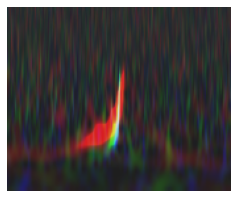

In [ ]:
show_image(x[-1,:])

<matplotlib.colorbar.Colorbar>

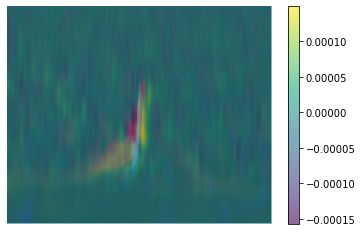

In [ ]:
w = grad[0].mean(dim=[1,2], keepdim=True)
cam_map = (w * act[0]).sum(0)
_,ax = plt.subplots()
show_image(x[-1,:], ax=ax)
img = ax.imshow(cam_map, alpha=0.6, extent=(0,170,140,0), interpolation='bilinear', cmap='viridis');
plt.colorbar(img)

<matplotlib.colorbar.Colorbar>

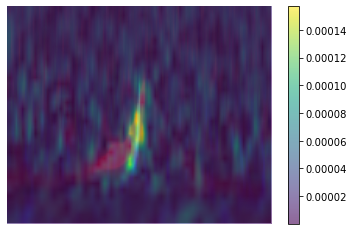

In [ ]:
w = grad[0].mean(dim=[1,2], keepdim=True)
cam_map = abs((w * act[0]).sum(0))
_,ax = plt.subplots()
show_image(x[-1,:], ax=ax)
img = ax.imshow(cam_map, alpha=0.6, extent=(0,170,140,0), interpolation='bilinear', cmap='viridis');
plt.colorbar(img)